In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import numpy as np

In [2]:
sns.set_theme(style="whitegrid")
# sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")

## Addition

In [60]:
adder_df = pd.read_json("Addition/synopsys_results.json")
adder_df = adder_df[(adder_df['Exp']==1) | (adder_df['Bits']==32)]
adder_df.head()

,Design,Bits,Exp,Area,Power,Delay,Energy
0,PACoGen,8,1,1072.041611,1.1954,1.81,2.163674
2,PACoGen,16,1,2207.822421,2.4366,2.70,6.578820
4,PACoGen,32,2,5144.764831,5.6565,4.07,23.021955
5,FloPosit,8,1,683.020804,0.7207,2.14,1.542298
7,FloPosit,16,1,1500.811205,1.7047,3.03,5.165241


In [57]:
adder_df.groupby(["Design", "Bits"], sort=False).sum().columns

Index(['Area', 'Power', 'Delay', 'Energy'], dtype='object')

In [89]:
aux_adder = adder_df.groupby(["Design", "Bits"], sort=False).sum()
# print(aux_adder.head())
two_dec = lambda x: "%.2f"%(x)
print(aux_adder.to_latex(multirow=True,
                        position="!t",
                        column_format="lccccc",
                        # header=["Area (\\si{\\micro\\metre\\squared})", "Power (\si{\milli\watt})", "Delay (\si{\nano\second})", r"Energy (\si{\pico\joule})"],
                        formatters=[two_dec, two_dec, two_dec, two_dec],
                        caption="Synthesis results for different \positenv{n}{2} adder designs."),
                        )

\begin{table}[!t]
\centering
\caption{Synthesis results for different \positenv{n}{2} adder designs.}
\begin{tabular}{lcrrrr}
\toprule
         &    &    Area & Power & Delay & Energy \\
Design & Bits &         &       &       &        \\
\midrule
\multirow{3}{*}{PACoGen} & 8  & 1084.04 &  1.18 &  1.92 &   2.26 \\
         & 16 & 2231.58 &  2.48 &  2.67 &   6.63 \\
         & 32 & 5144.76 &  5.66 &  4.07 &  23.02 \\
\cline{1-6}
\multirow{3}{*}{FloPosit} & 8  &  688.43 &  0.69 &  1.95 &   1.35 \\
         & 16 & 1482.00 &  1.69 &  2.92 &   4.94 \\
         & 32 & 3393.23 &  4.13 &  4.79 &  19.80 \\
\cline{1-6}
\multirow{3}{*}{MARTo} & 8  &  556.72 &  0.63 &  1.75 &   1.09 \\
         & 16 & 1293.36 &  1.45 &  2.45 &   3.55 \\
         & 32 & 2929.65 &  3.19 &  3.81 &  12.16 \\
\cline{1-6}
\multirow{3}{*}{Proposed} & 8  &  576.24 &  0.59 &  1.79 &   1.06 \\
         & 16 & 1176.71 &  1.22 &  2.89 &   3.53 \\
         & 32 & 2622.95 &  2.77 &  4.30 &  11.93 \\
\bottomrule
\end{tabular}
\e

In [61]:
area_df = adder_df[["Area", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)
power_df = adder_df[["Power", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)
delay_df = adder_df[["Delay", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)
energy_df = adder_df[["Energy", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)

area_df.head()

Area                                       
Design        PACoGen     FloPosit        MARTo     Proposed
Bits Exp                                                    
8    1    1072.041611   683.020804   585.883201   596.937603
16   1    2207.822421  1500.811205  1332.408004  1263.494410
32   2    5144.764831  3393.230403  2929.651213  2622.950420

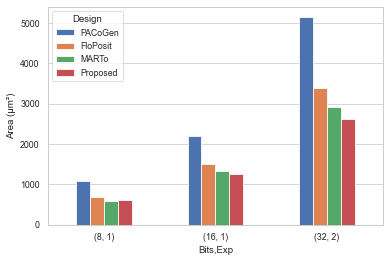

In [62]:
area_df.plot.bar(
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)"
)

plt.grid(False, axis="x")
plt.show()

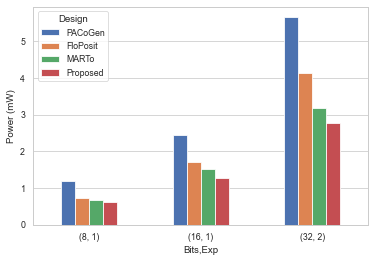

In [63]:
power_df.plot.bar(
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)"
)

plt.grid(False, axis="x")
plt.show()

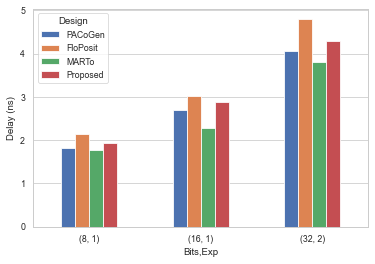

In [64]:
delay_df.plot.bar(
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)"
)

plt.grid(False, axis="x")
plt.show()

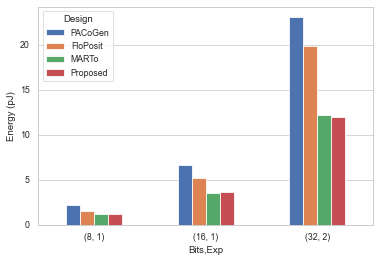

In [65]:
energy_df.plot.bar(
                 y="Energy",
                 rot = 0,
                 ylabel="Energy (pJ)"
)

plt.grid(False, axis="x")
plt.show()

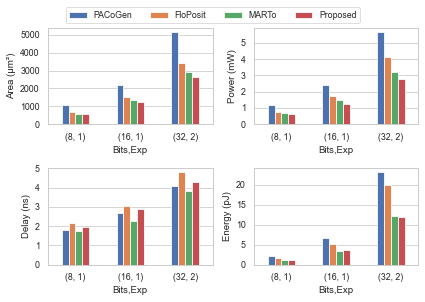

In [66]:
fig, axs = plt.subplots(2, 2)
# fig, axs = plt.subplots(2, 2, figsize=(10,6))
# fig, axs = plt.subplots(2, 2, figsize=(15,8))

area_df.plot.bar(ax=axs[0,0], legend=False,
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)"
)
axs[0,0].grid(False, axis="x")
axs[0,0].set_yticks(np.arange(0,6000,1000))

power_df.plot.bar(ax=axs[0,1], legend=False,
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)"
)
axs[0,1].grid(False, axis="x")
axs[0,1].set_yticks(np.arange(0,6,1))

delay_df.plot.bar(ax=axs[1,0], legend=False,
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)"
)
axs[1,0].grid(False, axis="x")
axs[1,0].set_yticks(np.arange(0,6,1))

energy_df.plot.bar(ax=axs[1,1], legend=False,
                 y="Energy",
                 rot = 0,
                #  logy="sym",
                 ylabel="Energy (pJ)"
)
axs[1,1].grid(False, axis="x")

# plt.legend(loc="upper left")
axLine, axLabel = axs[1,1].get_legend_handles_labels()
fig.legend(axLine, axLabel,           
           loc = 'upper center',
           ncol=4,
           bbox_to_anchor=(0.5, 1.05)
           )

# fig.suptitle("Posit Adder synthesis")
fig.tight_layout()

plt.savefig("figs/adder.pdf", bbox_inches="tight")
plt.show()

## Multiplication

In [50]:
mult_df = pd.read_json("Multiplication/synopsys_results.json")
mult_df = mult_df[(mult_df['Exp']==1) | (mult_df['Bits']==32)]
mult_df.head()

,Design,Bits,Exp,Area,Power,Delay,Energy
0,PACoGen,8,1,1154.596807,1.4514,1.55,2.249670
2,PACoGen,16,1,3355.128017,5.0461,2.53,12.766633
4,PACoGen,32,2,10309.992072,18.3376,4.47,81.969072
5,FloPosit,8,1,616.224003,0.7376,1.47,1.084272
7,FloPosit,16,1,2250.628813,3.5270,2.74,9.663980


In [51]:
area_df = mult_df[["Area", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)
power_df = mult_df[["Power", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)
delay_df = mult_df[["Delay", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)
energy_df = mult_df[["Energy", "Design", "Bits", "Exp"]].groupby(["Design", "Bits", "Exp"], sort=False).sum().unstack(0)

area_df.head()

Area                                       
Design         PACoGen     FloPosit        MARTo     Proposed
Bits Exp                                                     
8    1     1154.596807   616.224003   615.753601   585.412802
16   1     3355.128017  2250.628813  2170.896009  2070.700813
32   2    10309.992072  8132.980841  7690.334447  7468.305652

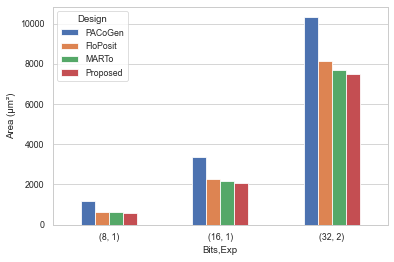

In [52]:
area_df.plot.bar(
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)"
)

plt.grid(False, axis="x")
plt.show()

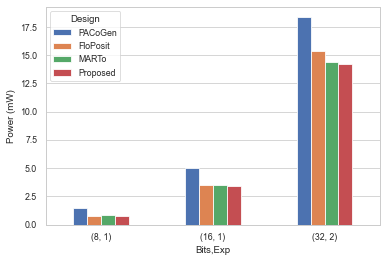

In [53]:
power_df.plot.bar(
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)"
)

plt.grid(False, axis="x")
plt.show()

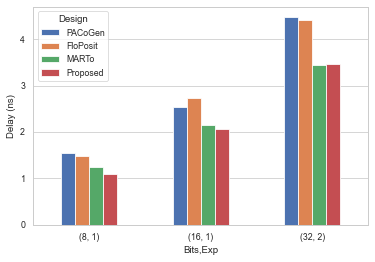

In [54]:
delay_df.plot.bar(
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)"
)

plt.grid(False, axis="x")
plt.show()

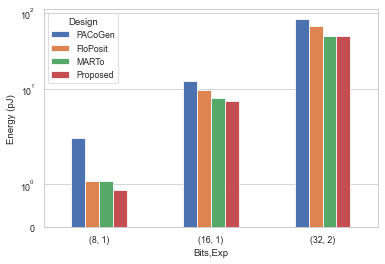

In [55]:
energy_df.plot.bar(
                 y="Energy",
                 rot = 0,
                 logy="sym",
                 ylabel="Energy (pJ)"
)

plt.grid(False, axis="x")
plt.show()

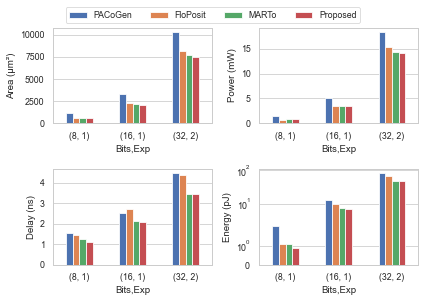

In [56]:
fig, axs = plt.subplots(2, 2)
# fig, axs = plt.subplots(2, 2, figsize=(10,6))
# fig, axs = plt.subplots(2, 2, figsize=(15,8))

area_df.plot.bar(ax=axs[0,0], legend=False,
                 y="Area",
                 rot = 0,
                 ylabel="Area (µm²)"
)
axs[0,0].grid(False, axis="x")
# axs[0,0].set_yticks(np.arange(0,12000,2000))

power_df.plot.bar(ax=axs[0,1], legend=False,
                 y="Power",
                 rot = 0,
                 ylabel="Power (mW)"
)
axs[0,1].grid(False, axis="x")

delay_df.plot.bar(ax=axs[1,0], legend=False,
                 y="Delay",
                 rot = 0,
                 ylabel="Delay (ns)"
)
axs[1,0].grid(False, axis="x")

energy_df.plot.bar(ax=axs[1,1], legend=False,
                 y="Energy",
                 rot = 0,
                 logy="sym",
                 ylabel="Energy (pJ)"
)
axs[1,1].grid(False, axis="x")

# plt.legend(loc="upper left")
axLine, axLabel = axs[1,1].get_legend_handles_labels()
fig.legend(axLine, axLabel,           
           loc = 'upper center',
           ncol=4,
           bbox_to_anchor=(0.5, 1.05)
           )

# fig.suptitle("Posit Multiplier synthesis")
fig.tight_layout()

plt.savefig("figs/mult.pdf", bbox_inches="tight")
plt.show()

## Single component comparison

In [17]:
# my_color_palette = ["#003f5b", "#ffa600"]
my_color_palette = ["#0b84a5", "#f6c85f"]
my_color_palette = ["#9dd866", "#ca472f"]

In [18]:
components_df = pd.read_json("Misc/synopsys_results.json")
components_df.head()

,Component,Design,Area,Power,Delay,Energy
0,Decoder,Old,591.057600,0.5896,1.47,0.866712
1,Decoder,New,392.078402,0.2687,0.88,0.236456
2,Encoder,Old,843.662399,0.8172,1.14,0.931608
3,Encoder,New,564.244803,0.5120,0.93,0.476160
4,Adder,Old,1387.915205,1.4425,2.95,4.255375


In [19]:
decoder_df = components_df[components_df["Component"]=="Decoder"].groupby(["Design"], sort=False).sum().T
encoder_df = components_df[components_df["Component"]=="Encoder"].groupby(["Design"], sort=False).sum().T
adder_df = components_df[components_df["Component"]=="Adder"].groupby(["Design"], sort=False).sum().T
multiplier_df = components_df[components_df["Component"]=="Multiplier"].groupby(["Design"], sort=False).sum().T

In [20]:
# Normalize results with respect Old decoding format
designs = ["New", "Old"]
for d in designs:
    decoder_df[d] /= decoder_df["Old"]
    encoder_df[d] /= encoder_df["Old"]
    adder_df[d] /= adder_df["Old"]
    multiplier_df[d] /= multiplier_df["Old"]

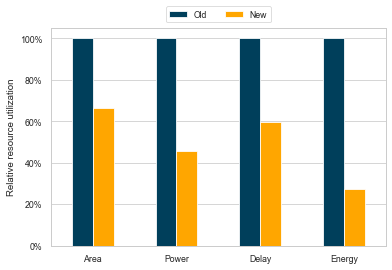

In [21]:
ax = decoder_df.plot.bar(
                 rot = 0,
                 ylabel="Relative resource utilization",
                 color=my_color_palette,
                #  title="Decoder component"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.legend(loc = 'center right',bbox_to_anchor=(1.2, 0.5))
plt.legend(loc = 'upper center',
           ncol=2,
           bbox_to_anchor=(0.5, 1.12)
           )
plt.grid(False, axis="x")
plt.savefig("figs/decoder_cmp.pdf", bbox_inches="tight")
plt.show()

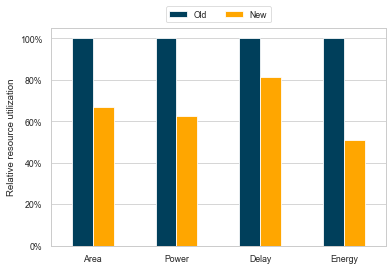

In [22]:
ax = encoder_df.plot.bar(
                 rot = 0,
                 ylabel="Relative resource utilization",
                 color=my_color_palette,
                #  title="Encoder component"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.legend(loc = 'center right',bbox_to_anchor=(1.2, 0.5))
plt.legend(loc = 'upper center',
           ncol=2,
           bbox_to_anchor=(0.5, 1.12)
           )
plt.grid(False, axis="x")
plt.savefig("figs/encoder_cmp.pdf", bbox_inches="tight")
plt.grid(False, axis="x")
plt.show()

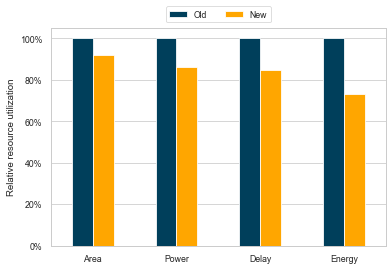

In [23]:
ax = adder_df.plot.bar(
                 rot = 0,
                 ylabel="Relative resource utilization",
                 color=my_color_palette,
                #  title="Adder component"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.legend(loc = 'center right',bbox_to_anchor=(1.2, 0.5))
plt.legend(loc = 'upper center',
           ncol=2,
           bbox_to_anchor=(0.5, 1.12)
           )
plt.grid(False, axis="x")
plt.savefig("figs/adder_cmp.pdf", bbox_inches="tight")
plt.show()

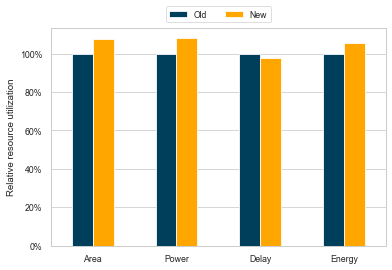

In [24]:
ax = multiplier_df.plot.bar(
                 rot = 0,
                 ylabel="Relative resource utilization",
                 color=my_color_palette,
                #  title="Multiplier component"
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
# plt.legend(loc = 'center right',bbox_to_anchor=(1.2, 0.5))
plt.legend(loc = 'upper center',
           ncol=2,
           bbox_to_anchor=(0.5, 1.12)
           )
plt.grid(False, axis="x")
plt.savefig("figs/mutiplier_cmp.pdf", bbox_inches="tight")
plt.show()